# **Project 5: "Hold out vs K-Fold" Cross Validation in LASSO Problem**

#### Realised by: Alexandre Marquis et Mohamed Ali Jebali

## **1. Introduction: Hyperparameter tuning**

From its first appearance by Tibshirani (1996), the Lasso estimator has become one of the most common and useful tools in statistics, machine learning and other domains such as econometrics. Since that, many papers have been concerned with the optimal value of the regularization parameter, that we will denote $\lambda_{reg}$ all along this project. 

Several methods for choosing this parameter exist and, during our project, we will try to introduce some theoretical and practical results about two famous model evaluation techniques: **Hold-Out and K-Fold Cross Validation** for solving the Lasso task.

But how can we evaluate a lasso estimator $g(\lambda_{reg})$ and decide if it is good or not without knowing the true risk $R(g(\lambda_{reg}))$?

In the following part, we will give a short statistical framework of our problem.

## **2. Statistical Framework**

### **2.1) The Lasso Framework**

**Risk Minimization**

We will consider the regression model:

\begin{equation}
\begin{array}{ll}
Y=X^T\theta+ \epsilon & ; & E[\epsilon|X]=0.
\end{array}
\end{equation}

where $Y$ is a dependent variable in $\mathbb{R}$, $X$ in $\mathbb{R}^d$ a $d$-vector of covariates, $\epsilon \in \mathbb{R}$ an observed noise and $\theta$ a vector of coefficient in $\mathbb{R}^d$.

------------------------------------
**ASSUMPTIONS**

**For simplicity reasons, we will suppose that the vector $X$ consist of independent standard Gaussian random variable, that $\theta$ is a sparse vector and that the conditional distribution of $\epsilon|X$ is also a gaussian.**

------------------------------------
Let $P$ be a gaussian probability measure and suppose that we want to assess a quantity $g$ in the space $G_\theta=\left\{ g(x) = \theta^Tx : \theta \in \mathbb{R}^d \right\}$ that minimizes the expected loss that we will call the true risk $R(g)$.

\begin{equation}
R(g)=\mathbb{E}_P[l(Z,g, \lambda_{reg})]
\end{equation}

where $Z=(X,Y)$ and  $l(Z,g, \lambda_{reg})= (Y-g(X))^2 + \lambda_{reg}||\theta||_1$. 


The Lasso problem aims to find the best solution among the set $G=\left\{ g(x) = \theta^Tx : \theta \in \mathbb{R}^d \right\}$ that corresponds to finding the minimizer of the following lasso problem:

\begin{equation}
\hat{g}(\lambda_{reg} ) = \underset{g\in G}{\mathrm{argmin}}\left\{ (Y-g(X))^2 + \lambda_{reg}||\theta||_1 \right\} (1)
\end{equation}

We clearly see that, to perform the lasso estimator $\hat{g}(\lambda_{reg})$, one has to choose an adequate value of $\lambda_{reg}$ so that we obtain a consistent Lasso estimator. On the other hand, for a unsuitable value of the regularization parameter, the Lasso estimator may not be consistent and even have a slower rate of convergence.


**Empirical Risk Minimization**

Let be $(Z_i)_{i=1,...,n}=(X_i, Y_i)_{i=1,...,n}\in (\mathbb{R}^d\times \mathbb{R})^n$ be a random sample on  independent and identically distributed sequence of variables with common distribution $P$ as defined in the previous part.


As we only have $n$ observations, we can not evaluate the true risk $R_\lambda(\hat{g}(\lambda_{reg}))$ of our predictor, and we could only obtain the empirical risk minimizer solving the following problem:

\begin{equation}
\hat{g}(\lambda_{reg}) = \underset{g\in G}{\mathrm{argmin}}\left\{ \frac{1}{n}\sum_{i=1}^n (Y_i-g(X_i))^2 + \lambda_{reg}||\theta||_1 \right\} (2)
\end{equation}

\begin{equation}
\Leftrightarrow
\hat{\theta}(\lambda_{reg}) = \underset{\theta \in \mathbb{R}^d}{\mathrm{argmin}}\left\{ \frac{1}{n}\sum_{i=1}^n (Y_i-\theta^TX_i))^2 + \lambda_{reg}||\theta||_1 \right\} (3)
\end{equation}

**To simplify notations, we will try to solve $(3)$ which is equivalent to $(2)$**

In this context of penalized regression, our challenge will be to a tuning the best regularization parameter $\lambda_{reg}$ among a range of possible values that we will denote $A_M=\left\{\lambda_1, \lambda_2 . . . , \lambda_M
\right\} $. This is a challenging task as it represents the importance of the $L_1$ penalization with respect to the $MSE$ loss.


It is obvious that the risk $\hat{R}(g(\lambda_{reg}))=\hat{R}(\theta(\lambda_{reg}))$ we are minimizing in 
**$(2)$** is a biased risk and depends on the samples we have. At this point, we can not assess our model with respect to the true risk $R(\theta(\lambda_{reg})$, but our challenge will be to estimate the true risk. In fact,

\begin{equation}
\hat{R}(\theta(\lambda_{reg})) \leq R(\theta(\lambda_{reg})) \Leftrightarrow \mathbb{E}[\hat{R}(\theta(\lambda_{reg}))] \leq R(\theta(\lambda_{reg}))
\end{equation}


So how can we get **the better estimate** $\hat{R}(\theta(\lambda_{reg})$ of the **true risk** i.e How can we get the best regularization parameter $\lambda_{reg}$?


The two previously proposed approaches give some decent results that we will try to detail.

### **1.a) Hold-Out Estimate**

The main goal here is to cancel the bias associated to the estimation of $R(\hat{\theta}(\lambda_{reg}))$. The main idea is to split the sample $\left\{1, . . . , n
\right\}$ in two independent subsamples $S^C$ and its complement $S$, respectively called the training and the testing/holdout samples. 

As the training set will be used to compute $\hat{\theta}$ and then assess it using the holdout set, one could simply denote the minimizer$\hat{\theta}_{S^C}(\lambda_{reg})$ and the risk we are minimizing as $\hat{R}_{S}(\hat{\theta}_{S^C}(\lambda_{reg}))$.

With these notations, we can conclude that we obtain an unbiased estimator of the true risk with a variance $Var(\hat{R}_S(\hat{\theta}_{S^C}(\lambda_{reg})) = \frac{1}{|S|}Var(l(Z_1,\hat{\theta}_{S^C}(\lambda)) )$.

**Model Selection**

$\forall \lambda_k \in A_M$, $k\leq M$ ; we need to choose

\begin{equation}
\hat{\lambda}_{reg} = \underset{\lambda_{reg} \in A_M}{\mathrm{argmin}}\left\{ \frac{1}{n}\sum_{i=1}^n (Y_i-\hat{\theta}_{S^C}(\lambda_{reg})^TX_i)^2 \right\} (4)

\end{equation}

### **1.b) K-Fold Cross Validation**

Since the developement of computation power, the most commonly used method for model assessment is K-Fold cross validation. In a perfect setting, with plentiful data, independent test data could be used to estimate the prediction error of a number of candidate models. For the lasso, the candidate models are defined by the sequence of  values $A_M$. The optimal value of $\lambda_{reg}$, denoted $\hat{\lambda_{reg}}$, could then be taken to be the value corresponding to the candidate model with the smallest prediction error. Let's try to describe this strategy:

- Let $K\in \mathbb{N}^*$ be a strictly positive integer. First randomize the sample by applying a random permutation $(Z_{\sigma(i)})_{i=1,...,n}$ in order to avoid any structure dependence.

- Partition randomly the sample $\left\{1, . . . , n\right\}$ randomly into $K$-Folds. We will denote each fold $k$ as:
\begin{equation}
\begin{array}{ll}
S_k=(X_{(k-1)p+1},..., X_{kp}) ; & k\leq K ;& p=\frac{K}{n} \\
S_k \cap S_{k'} = \emptyset ; \forall k\neq k'\leq K & and & \cup S_k=[1,...n] 
\end{array}
\end{equation}

- For asymptotic analysis, we will assume that $K$ does not depend on $n$ as done in our lesson.

- Withhold one of the  folds and fit each candidate model to the remaining  folds i.e compute the Lasso estimator .

\begin{equation}
\hat{\theta}_{-k}(\lambda_{reg}) = \underset{\theta \in \mathbb{R}^d}{\mathrm{argmin}}\left\{ \frac{1}{n-|S_k|}\sum_{i\notin S_k} (Y_i-\theta^TX_i)^2 + \lambda_{reg}||\theta||_1 \right\} (5)
\end{equation}

- Repeat steps 2–3 until each of the  folds of data have been withheld and aggregate the prediction errors obtained over the  folds.

\begin{equation}
\hat{R}_{CV}=\frac{1}{K}\sum_{k=1}^K \sum_{i\in S_k}(Y_i - \hat{\theta}_{-k}(\lambda_{reg})^TX_i)^2
\end{equation}


**Model Selection**

The optimal value $\hat{\lambda}_{reg}$ is chosen to be the value that corresponds to the candidate model with the smallest aggregated prediction error.


\begin{equation}
\hat{\lambda}_{reg} = \underset{\lambda_{reg} \in A_M}{\mathrm{argmin}}\left\{\sum_{k=1}^{K}  \sum_{i\in S_k} (Y_i-\hat{\theta}_{-k}(\lambda_{reg})^TX_i)^2 \right\} (6)

\end{equation}

### **1.c) Differences between Holdout and K-Fold Cross Validation**

- First of all, it is clear here that the K-Fold Cross Validation is **computationnaly** harder than the basic HoldOut. This is why it has not been used widely for solving the Lasso (or all Machine Learning problems in general) before the growth of the computational power of machines. 

- Second, one can notice that **the Holdout Risk** is biased and thus directly dependent on the choce of the **Training set** that we've denoted **S_C**. This problem is **completely** avoid in the $K$-Fold Cross Validation where the Risk is based on the whole dataset.

- Third, The $K$-Fold Cross Validation permits to make a more powerful bound for the estimator and/or for the risk. In fact, in "On Cross-Validated Lasso" by Chetverikov and Liao, under the conditions we've mentionned in 2.1) (Sparsity of coefficients and the gaussian nature of the distributions), one can show that:

\begin{equation}
|| \hat{\theta}_{CV}(\hat{\lambda})- \theta ||_{2,n} \lesssim \sqrt{\frac{s\log(d)}{n}}.\log^{\frac{7}{8}}(dn)
\end{equation}
with the same notations as in the statistical framework part.

## **3. Code and Comments**

In this part, we will try to implement and plot some results for the Lasso problem to compare the Holdout and the K-Fold cross validation.

### **3.1) Simulate the data for the Lasso Problem with previously mentionned assumptions.**

In [1]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

from scipy.linalg.special_matrices import toeplitz
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd
import warnings
import time
from tqdm.notebook import tqdm

%matplotlib inline

def warn(*args, **kwargs):
    pass

warnings.warn = warn

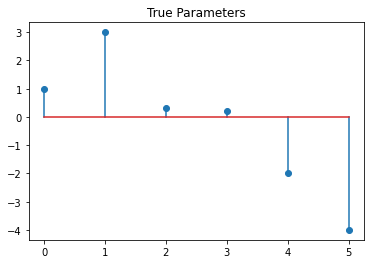

In [2]:
coefs = [1,3,0.3,0.2,-2,-4]
alphas = np.linspace(0,4,101)
param_gs = {'alpha': alphas}
n_iter = 100
plt.stem(coefs)
plt.title("True Parameters")
plt.show()


In [3]:
def simu(n_samples=100, n_features= 5):

  f = np.vectorize(lambda x : 1*x**5+3*x**4+0.3*x**3+0.2*x**2-2*x-4)
  X = np.sort(np.random.uniform(-3,1.5, n_samples))
  X_powered = (X[None]**np.arange(n_features)[:,None]).T
  y = f(X) + np.random.normal(0,0.01, n_samples)
  return X_powered, y



### **3.4) Studying the variance of Holdout and K-Folds Cross Validation**

During this part, we will try to investigate more about the variance of each model selection strategy. As we've discussed before, we will show how much the variance of the K-Fold Cross Validation decreases as the number of folds $K$ increase, and is smaller than the Hold-Out Variance.

We have used the GridSearchCV library from sklearn.model_selection to show some results.

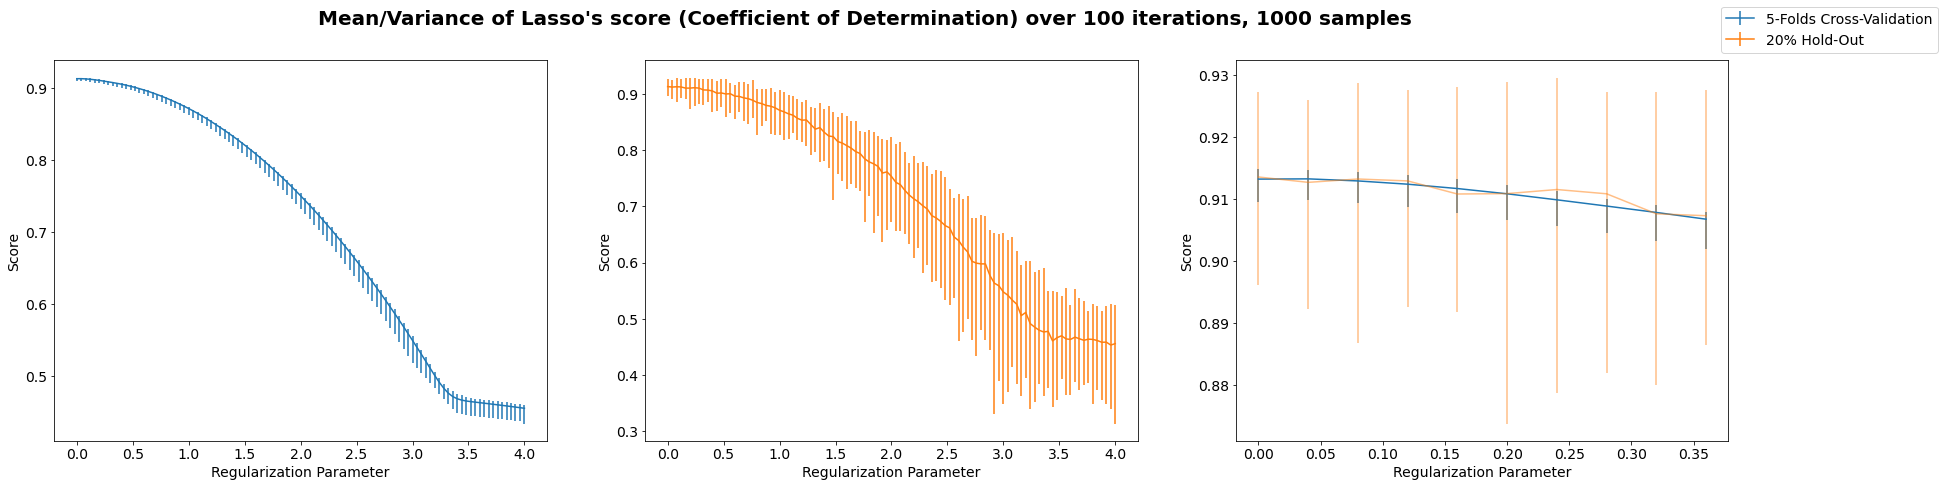

In [4]:
def plot_var(n_samples = 1000):
  X, y = simu(n_samples)
  scores_cv = np.empty((n_iter, len(alphas)))
  scores_ho = np.empty((n_iter, len(alphas)))
  for i in tqdm(range(n_iter)):
    p = np.random.permutation(list(range(len(y))))
    X, y = X[p], y[p]
    gs = GridSearchCV(Lasso(),param_gs,verbose=False)
    gs.fit(X, y)
    scores_cv[i] = gs.cv_results_['mean_test_score']

    for k, alpha in enumerate(alphas) :
      X_train, X_test, y_train, y_test = train_test_split(X,y)
      gs = Lasso(alpha)
      gs.fit(X_train, y_train)
      score = gs.score(X_test,y_test)
      scores_ho[i][k] = score

  plt.rcParams.update({'font.size': 14})
  f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 7))
  err =  np.array([np.mean(scores_cv, axis=0)- np.min(scores_cv, axis=0), np.max(scores_cv, axis=0)- np.mean(scores_cv, axis=0)])
  ax1.errorbar(alphas,np.mean(scores_cv, axis=0), err, color='C0')
  err =  np.array([np.mean(scores_ho, axis=0)- np.min(scores_ho, axis=0), np.max(scores_ho, axis=0)- np.mean(scores_ho, axis=0)])
  ax2.errorbar(alphas,np.mean(scores_ho, axis=0), err , color='C1')
  err =  np.array([np.mean(scores_cv, axis=0)- np.min(scores_cv, axis=0), np.max(scores_cv, axis=0)- np.mean(scores_cv, axis=0)])
  plt.errorbar(alphas[0:10],np.mean(scores_cv, axis=0)[0:10], err[:,0:10], color='C0')
  err =  np.array([np.mean(scores_ho, axis=0)- np.min(scores_ho, axis=0), np.max(scores_ho, axis=0)- np.mean(scores_ho, axis=0)])
  ax3.errorbar(alphas[0:10],np.mean(scores_ho, axis=0)[0:10], err[:,0:10] , alpha=0.5, color='C1')
  f.legend(["5-Folds Cross-Validation", "20% Hold-Out"])
  f.suptitle("Mean/Variance of Lasso's score (Coefficient of Determination) over 100 iterations, " +str(n_samples)+ " samples", fontsize=20, fontweight="bold")
  ax3.set_xlabel("Regularization Parameter")
  ax3.set_ylabel("Score")
  ax2.set_xlabel("Regularization Parameter")
  ax2.set_ylabel("Score")
  ax1.set_xlabel("Regularization Parameter")
  ax1.set_ylabel("Score")
  f.show()

plot_var(1000)

On this first result we can clearly see that the variance of the Lasso's score estimated using the hold out technique is way higher than the variance using the Cross Validation. However the curve of the mean is sensibly the same between both methods.

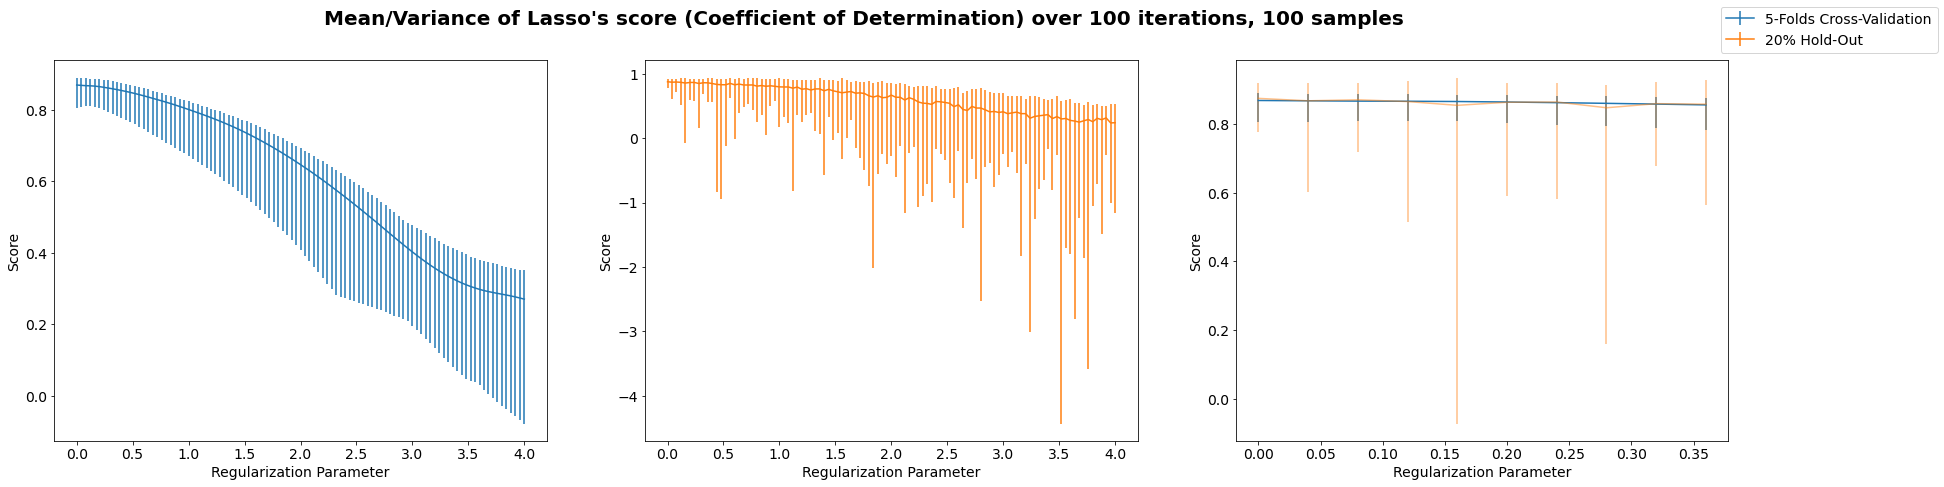

In [5]:
plot_var(100)

Here we reduced a lot the number of available samples. We can see that it increase a lot the variation for both methodes. However, the curve of the mean for the Hold out is totally deformed and is not close to the actual score of the Lasso model. So we cannot use the Hold out in this situation, we do not have enough samples.

In the part below, we will use the 'time' library to see the execution time of each strategy method on the sample. Even if the values and parameters of n_features and n_samples are not **very** high, we still have a large difference between the two strategies. So when working with some big data or using an online learning where the computational time is almost as important as the accuracy, we could choose the Holdout Validation over the K-Fold Cross Validation.

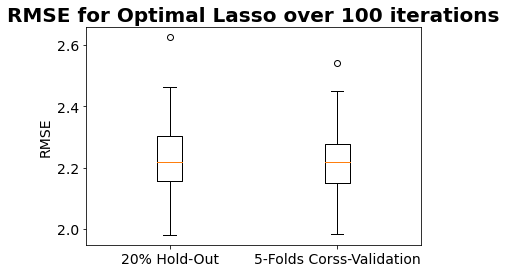

,Model Selection Strategy,Mean of Estimated risk,Variance of Estimated Risk,Execution Time
0,20% Hold-Out,2.230079,0.011432,8.803227
1,5-Folds Cross Validation,2.218618,0.009472,73.761033


In [6]:
scores_cv = np.empty(n_iter)
scores_ho = np.empty(n_iter)

time_cv=0
time_ho=0

for i in tqdm(range(n_iter)):
  X, y = simu(1000)
  X_train, X_test, y_train, y_test = train_test_split(X, y)

  start_cv = time.time()
  gs = GridSearchCV(Lasso(),param_gs,verbose=False, scoring='r2')
  gs.fit(X_train, y_train)
  best = gs.best_estimator_
  best.fit(X_train, y_train)
  y_pred = best.predict(X_test)
  scores_cv[i] = mean_squared_error(y_test, y_pred, squared= False)
  time_cv += time.time() - start_cv 

  X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_train, y_train)
  start_ho = time.time()
  best_err = None
  best_est = None
  for k, alpha in enumerate(alphas) :
    est = Lasso(alpha)
    est.fit(X_train_lasso, y_train_lasso)
    y_pred = est.predict(X_test_lasso) 
    err = mean_squared_error(y_test_lasso, y_pred, squared= False)
    if best_err == None or err < best_err:
      best_err = err
      best_est = est
  scores_ho[i] = mean_squared_error(y_test, best_est.predict(X_test), squared= False)
  time_ho += time.time() - start_ho 

plt.boxplot([scores_ho, scores_cv], labels=["20% Hold-Out", "5-Folds Corss-Validation"])
plt.ylabel("RMSE")
plt.title("RMSE for Optimal Lasso over 100 iterations", fontsize=20, fontweight="bold")
plt.show()
models_initial = pd.DataFrame({
    'Model Selection Strategy'       : ['20% Hold-Out',  '5-Folds Cross Validation'],
    'Mean of Estimated risk': [ np.mean(scores_ho),  np.mean(scores_cv)],
    'Variance of Estimated Risk': [np.var(scores_ho),  np.var(scores_cv)],
    'Execution Time'    : [time_ho,  time_cv],
    }, columns = ['Model Selection Strategy', 'Mean of Estimated risk', 'Variance of Estimated Risk', 'Execution Time'])

models_initial.sort_values(by='Execution Time', ascending=True)

## Conclusion

We saw how both methods works and compared them on the case of a Lasso problem. The main idea that one should retain of our project is that in general K-Folds Cross Validation is better (with 5 folds at least) because it reduces a lot the variance of the estimated risk. However there are few cases when Hold Out could be prefered : when there is a constraint of time and/or computational power for cross validation, when a data leak from the test set to the training/validation set can have horrible consequences or when we want a clear independance between our test set and our training set.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1l4sNu0Gmbd9HclIqhtPO6v0YjuAJQAnE' style="display:flex;text-align:center;" />
<figcaption>Summary Table</figcaption></center>
</figure>